In [1]:
import  pandas as  pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv('weight-height.csv')

In [3]:
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [4]:
df.replace(to_replace=["Male","Female"], value=[1,0], inplace= True)

In [5]:
df.head()

,Gender,Height,Weight
0,1,73.847017,241.893563
1,1,68.781904,162.310473
2,1,74.110105,212.740856
3,1,71.730978,220.042470
4,1,69.881796,206.349801


In [6]:
x = df.drop('Weight', axis=1)
y = df[['Weight']]

In [7]:
x.head()

,Gender,Height
0,1,73.847017
1,1,68.781904
2,1,74.110105
3,1,71.730978
4,1,69.881796


In [8]:
y.head()

,Weight
0,241.893563
1,162.310473
2,212.740856
3,220.042470
4,206.349801


In [9]:
y.shape

(8555, 1)

In [10]:
x.mean()

Gender     0.584454
Height    66.809925
dtype: float64

In [11]:
y.mean()

Weight    165.632735
dtype: float64

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
train, test = train_test_split(df,test_size=.30) #testing data 25%

In [14]:
train.shape

(5988, 3)

In [15]:
test.shape

(2567, 3)

In [16]:
train.head()

,Gender,Height,Weight
3048,1,70.192414,198.141175
7110,0,65.831369,147.150463
6724,0,64.306219,132.864068
3589,1,67.065756,175.088562
6631,0,67.336275,164.929043


In [17]:
xtrain,xtest,ytrain,ytest =train_test_split(x,y, test_size=.30, random_state=0) #testing data 25%

In [18]:
xtrain.head()

,Gender,Height
3197,1,69.689848
4394,1,66.299441
7711,0,63.261527
7019,0,62.035319
898,1,67.272171


In [19]:
ytrain.head()

,Weight
3197,186.377448
4394,159.235988
7711,126.426793
7019,119.418135
898,187.363366


# lenear Regression

In [20]:
from sklearn.linear_model import LinearRegression

In [21]:
lr = LinearRegression()

In [22]:
lr.fit(xtrain,ytrain)

LinearRegression()

In [23]:
m = lr.coef_
m

array([[19.67647385,  5.95976283]])

In [24]:
c =lr.intercept_
c

array([-244.11178083])

In [25]:
yp =19.67647385*1+ 5.95976283+-244.11178083
yp

-218.47554415

In [26]:
lr.predict([[1,69]])

C:\Users\Mahidul Islam Sinha\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[186.78832817]])

In [27]:
lr.predict([[1,67]])

C:\Users\Mahidul Islam Sinha\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[174.86880251]])

In [28]:
lr.coef_

array([[19.67647385,  5.95976283]])

In [29]:
x.head()

,Gender,Height
0,1,73.847017
1,1,68.781904
2,1,74.110105
3,1,71.730978
4,1,69.881796


In [30]:
df['predicted_Weight'] = lr.predict(x)

In [31]:
df.head()

,Gender,Height,Weight,predicted_Weight
0,1,73.847017,241.893563,215.675400
1,1,68.781904,162.310473,185.488528
2,1,74.110105,212.740856,217.243344
3,1,71.730978,220.042470,203.064312
4,1,69.881796,206.349801,192.043622


In [32]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [33]:
mse =  mean_squared_error(ytest, lr.predict(xtest))
mae =  mean_absolute_error(ytest, lr.predict(xtest))

In [34]:
mse

102.30154155088873

In [35]:
mae

8.029100527825232

In [36]:
lr.score(xtest,ytest)

0.9025307579174772

In [37]:
lr.predict([[1,67]])

C:\Users\Mahidul Islam Sinha\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[174.86880251]])

# KNN REGREASSION

In [38]:
from sklearn.neighbors import KNeighborsRegressor

In [39]:
kn= KNeighborsRegressor(n_neighbors= 100)

In [40]:
kn.fit(xtrain,ytrain)

KNeighborsRegressor(n_neighbors=100)

In [41]:
kn.predict(xtest)

array([[156.35772974],
       [184.89462646],
       [148.91700973],
       ...,
       [160.19922469],
       [168.0546762 ],
       [138.63572067]])

In [43]:
mse = mean_squared_error(ytest, kn.predict(xtest))
mae = mean_absolute_error(ytest, kn.predict(xtest))

In [44]:
mse

107.7627941322304

In [45]:
mae

8.188668873339074

In [47]:
kn.score(xtest,ytest)

0.8973274722010072

# Classification

In [48]:
x = df.drop('Gender', axis=1)
y =df[['Gender']]

In [50]:
y.head()

,Gender
0,1
1,1
2,1
3,1
4,1


In [51]:
x.head()

,Height,Weight,predicted_Weight
0,73.847017,241.893563,215.675400
1,68.781904,162.310473,185.488528
2,74.110105,212.740856,217.243344
3,71.730978,220.042470,203.064312
4,69.881796,206.349801,192.043622


In [52]:
xtrain,xtest,ytrain,ytest =train_test_split(x,y, test_size=.30, random_state=0) #testing data=25%

In [54]:
xtrain.head()

,Height,Weight,predicted_Weight
3197,69.689848,186.377448,190.899661
4394,66.299441,159.235988,170.693636
7711,63.261527,126.426793,132.911914
7019,62.035319,119.418135,125.604008
898,67.272171,187.363366,176.490875


In [56]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

In [57]:
knn_classifier = KNeighborsClassifier(n_neighbors=100)

In [58]:
knn_classifier.fit(xtrain, ytrain)

C:\Users\Mahidul Islam Sinha\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=100)

In [60]:
yp2 = knn_classifier.predict(xtest)

C:\Users\Mahidul Islam Sinha\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [61]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [62]:
cm = confusion_matrix(ytest , yp2)

In [63]:
cm

array([[1001,   67],
       [  80, 1419]], dtype=int64)

In [64]:
accuracy = accuracy_score(ytest,yp2)

In [65]:
accuracy 

0.9427347097779509

Text(33.22222222222222, 0.5, 'ACCTUAL')

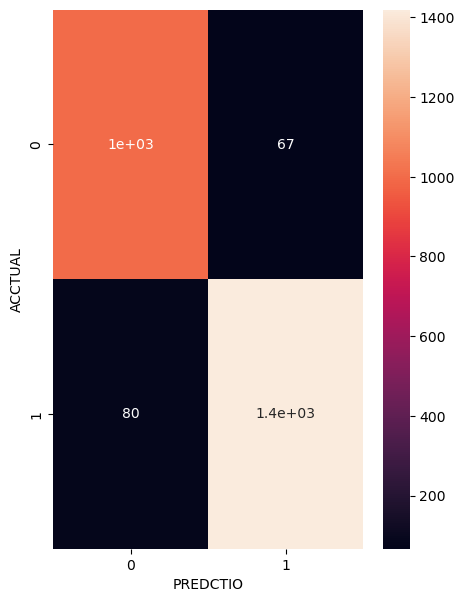

In [68]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn

plt.figure(figsize= (5,7))
sn.heatmap(cm, annot = True)
plt.xlabel('PREDCTIO')
plt.ylabel('ACCTUAL')